# WISDM DATASET

1. Import modules

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#single model classifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#ensemble model classifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

2. Dataset Information

In [2]:
#pd.read_csv('/Users/Husna/Downloads/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')

Solve error in dataset

In [3]:
file = open('/Users/Husna/Downloads/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [4]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [5]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head(100)

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164
...,...,...,...,...,...,...
95,33,Jogging,49116072311000,2.7649305,17.352324,7.7363577
96,33,Jogging,49116122238000,2.3426998,15.894946,3.6774938
97,33,Jogging,49116232315000,4.7943625,3.8273177,0.9942854
98,33,Jogging,49116342330000,-1.8387469,12.830367,-1.56634


In [6]:
data.shape

(343416, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [8]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [9]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [10]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [12]:
Fs = 20 #frequency

In [13]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

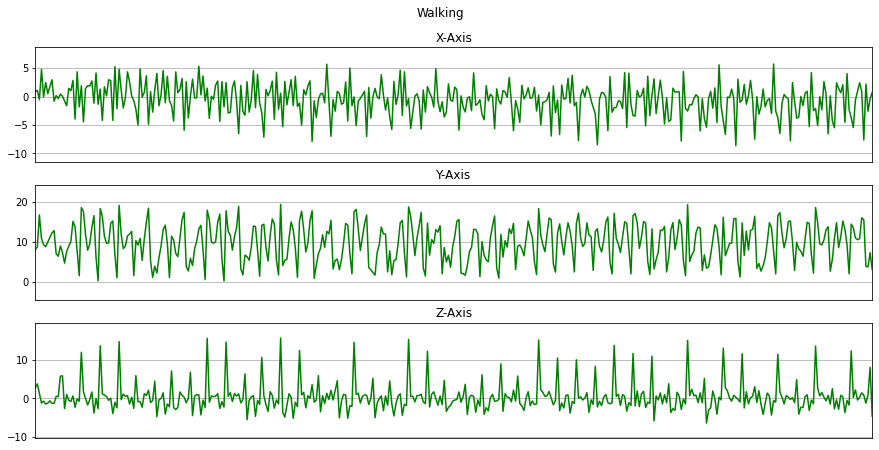

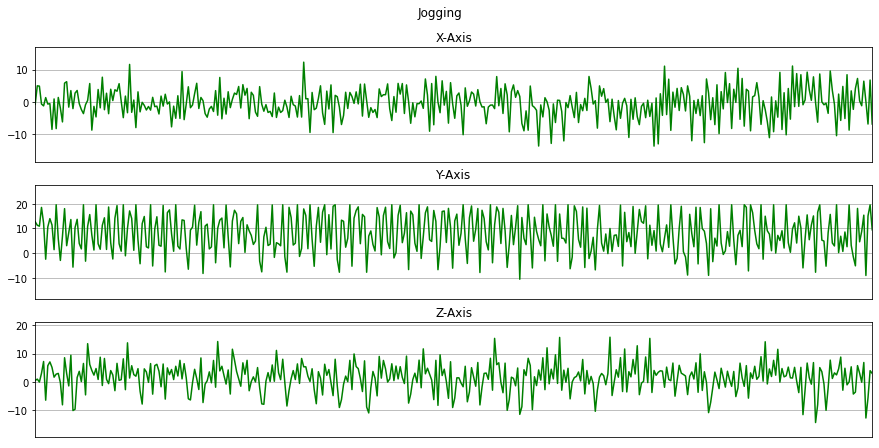

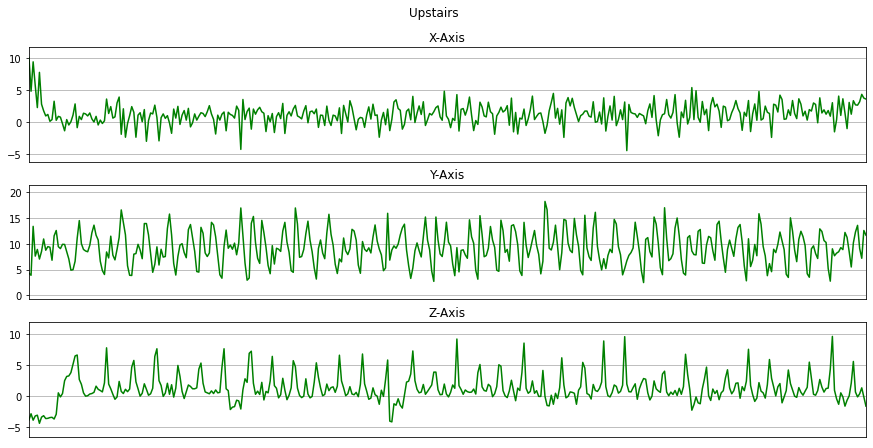

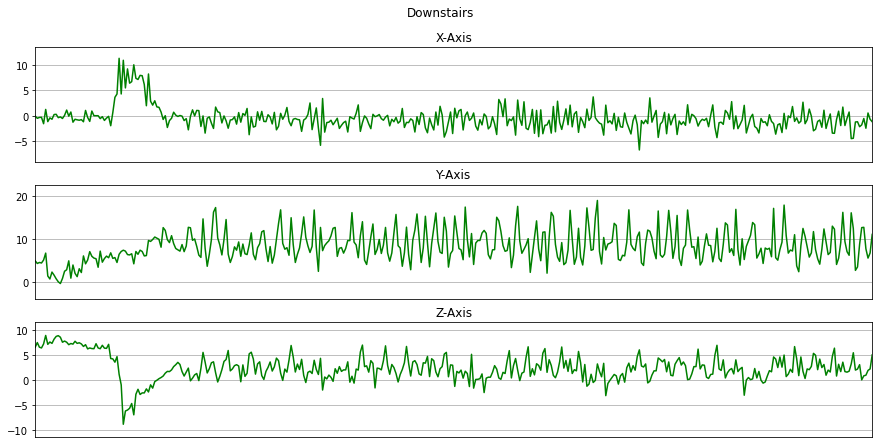

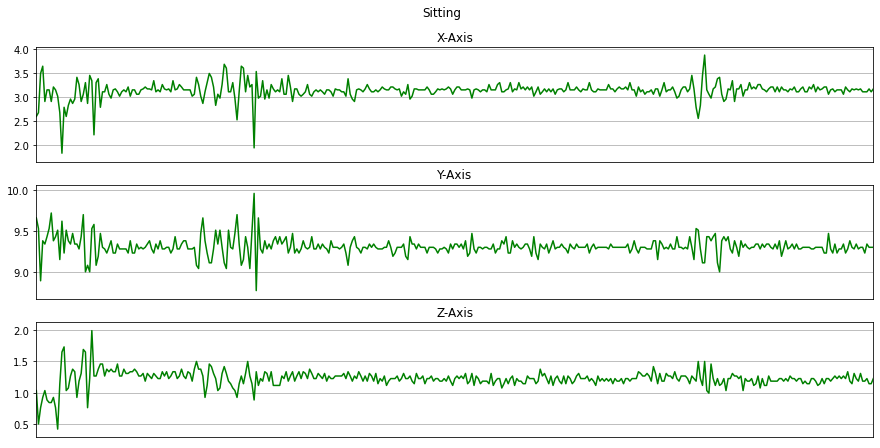

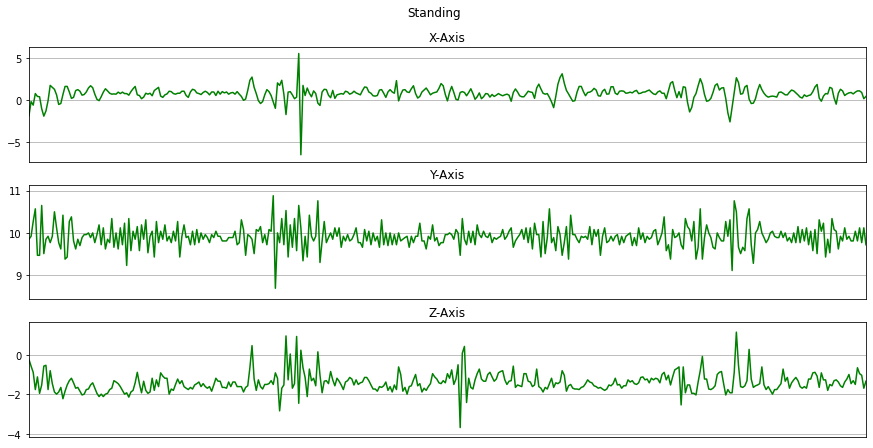

In [14]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*20]
    plot_activity(activity, data_for_plot)

In [15]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head(10)

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
5,Jogging,1.375655,-2.492524,-6.510526
6,Jogging,-0.612916,10.569390,5.706926
7,Jogging,-0.503953,13.947236,7.055340
8,Jogging,-8.430995,11.413852,5.134871
9,Jogging,0.953424,1.375655,1.648062


In [16]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [17]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging= df[df['activity']=='Jogging'].head(3555).copy()
Upstairs= df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs= df[df['activity']=='Downstairs'].head(3555).copy()
Sitting= df[df['activity']=='Sitting'].head(3555).copy()
Standing= df[df['activity']=='Standing'].copy()

3. Balance Data

In [18]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

C:\Users\Husna\AppData\Local\Temp\ipykernel_24808\353745668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])


(21330, 4)

In [19]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [20]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [21]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

4. Normalization/Standardization 

In [22]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


In [24]:
X.shape, y.shape

((21330, 3), (21330,))

In [25]:
#Train-Test Split with [7:3] ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [26]:
X_train.shape, X_test.shape

((14931, 3), (6399, 3))

# Classifier

1. SVM

In [27]:
classifier = svm.SVC(kernel='rbf', gamma='auto', C=2)
classifier.fit(X_train, y_train)
predtrain = classifier.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== SVM Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== SVM Model Training Phase ====================

Train accuracy   :  0.7310294019154778 



In [28]:
#test your model
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = classifier.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== SVM Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== SVM Model Test Phase ====================

Test accuracy   :  0.7285513361462729 

              precision    recall  f1-score   support

   downstair    0.52441   0.49311   0.50828      1089
     jogging    0.86358   0.65466   0.74475      1083
     sitting    0.95699   0.99695   0.97656       982
    standing    0.84294   0.99257   0.91165      1076
     upstair    0.55585   0.57788   0.56665      1085
     walking    0.65317   0.68450   0.66847      1084

    accuracy                        0.72855      6399
   macro avg    0.73282   0.73328   0.72939      6399
weighted avg    0.72890   0.72855   0.72503      6399
 

[[ 537   74    6   38  241  193]
 [ 128  709    3   20  113  110]
 [   0    0  979    0    3    0]
 [   0    0    0 1068    5    3]
 [ 228   22   26   94  627   88]
 [ 131   16    9   47  139  742]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

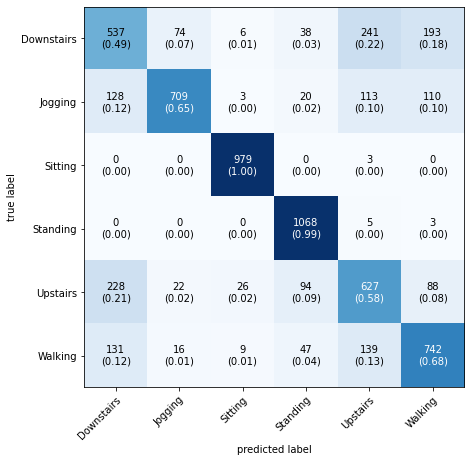

In [29]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

2. KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predtrain = knn.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== KNN Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== KNN Model Training Phase ====================

Train accuracy   :  0.8092559105217333 



In [31]:
#test your model
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = knn.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== KNN Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== KNN Model Test Phase ====================

Test accuracy   :  0.7229254571026723 

              precision    recall  f1-score   support

   downstair    0.48787   0.53535   0.51051      1089
     jogging    0.75789   0.66482   0.70831      1083
     sitting    0.98789   0.99695   0.99240       982
    standing    0.94316   0.98699   0.96458      1076
     upstair    0.53782   0.53733   0.53757      1085
     walking    0.66382   0.64483   0.65419      1084

    accuracy                        0.72293      6399
   macro avg    0.72974   0.72771   0.72793      6399
weighted avg    0.72514   0.72293   0.72322      6399
 

[[ 583  109    1   10  230  156]
 [ 153  720    1    7  103   99]
 [   1    0  979    0    2    0]
 [   4    2    0 1062    6    2]
 [ 296   67   10   32  583   97]
 [ 158   52    0   15  160  699]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

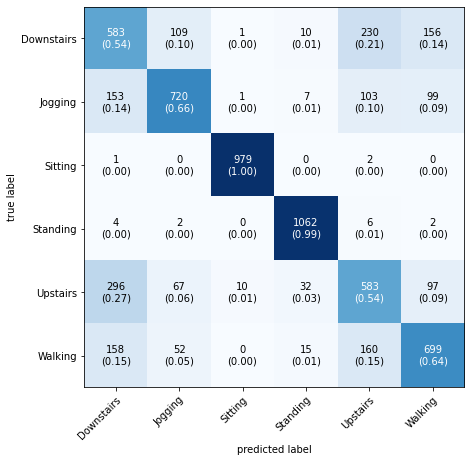

In [32]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

4. RF

In [33]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1, min_samples_split = 3, min_samples_leaf=2)
rf.fit(X_train, y_train)
predtrain = rf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== RF Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== RF Model Training Phase ====================

Train accuracy   :  0.795392137164289 



In [34]:
#test your model
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = rf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== RF Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names=target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== RF Model Test Phase ====================

Test accuracy   :  0.7415221128301297 

              precision    recall  f1-score   support

   downstair    0.53326   0.44169   0.48317      1089
     jogging    0.81930   0.67405   0.73961      1083
     sitting    0.99491   0.99491   0.99491       982
    standing    0.96007   0.98327   0.97153      1076
     upstair    0.55306   0.65806   0.60101      1085
     walking    0.63769   0.72417   0.67819      1084

    accuracy                        0.74152      6399
   macro avg    0.74972   0.74603   0.74474      6399
weighted avg    0.74533   0.74152   0.74024      6399
 

[[ 481  103    1    6  296  202]
 [ 116  730    0    5  115  117]
 [   1    0  977    0    3    1]
 [   3    0    0 1058    6    9]
 [ 203   27    4   20  714  117]
 [  98   31    0   13  157  785]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

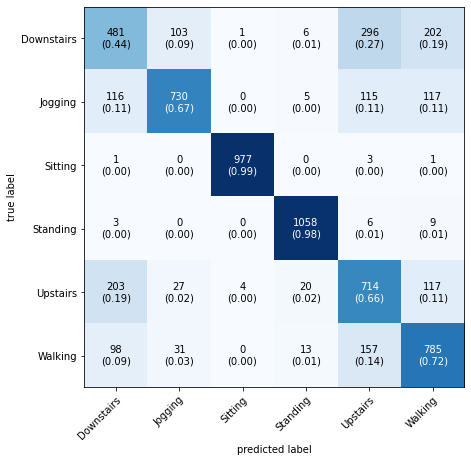

In [35]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

4. XGBoost

In [36]:
XGB = GradientBoostingClassifier()
XGB.fit(X_train, y_train)
predtrain = XGB.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== XGB Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== XGB Model Training Phase ====================

Train accuracy   :  0.7643828276739669 



In [37]:
#test your model
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = XGB.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== XGB Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== XGB Model Test Phase ====================

Test accuracy   :  0.7323019221753398 

              precision    recall  f1-score   support

   downstair    0.51212   0.46556   0.48773      1089
     jogging    0.83508   0.66390   0.73971      1083
     sitting    0.98886   0.99389   0.99137       982
    standing    0.94987   0.98606   0.96762      1076
     upstair    0.54118   0.59355   0.56615      1085
     walking    0.62201   0.71956   0.66724      1084

    accuracy                        0.73246      6399
   macro avg    0.74152   0.73709   0.73664      6399
weighted avg    0.73709   0.73246   0.73207      6399
 

[[ 507   79    2   12  282  207]
 [ 130  719    1    4  105  124]
 [   1    0  976    0    4    1]
 [   2    0    0 1061    5    8]
 [ 248   25    7   27  644  134]
 [ 102   38    1   13  150  780]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

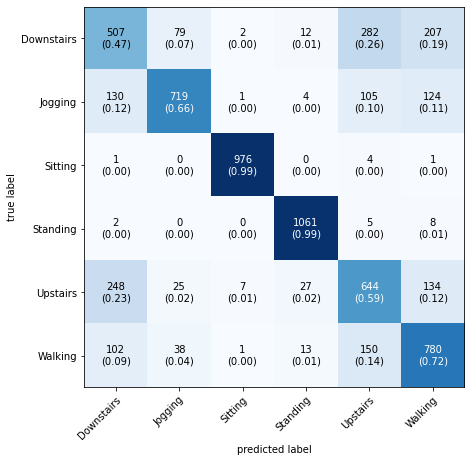

In [38]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

5. LightGBM

In [39]:
lgbm = LGBMClassifier(objective='multiclass', random_state=5)
lgbm.fit(X_train, y_train)
predtrain = lgbm.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== LGBM Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== LGBM Model Training Phase ====================

Train accuracy   :  0.8479003415712276 



In [40]:
#test your model
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = lgbm.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== LGBM Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== LGBM Model Test Phase ====================

Test accuracy   :  0.751836224410064 

              precision    recall  f1-score   support

   downstair    0.54268   0.49036   0.51520      1089
     jogging    0.81120   0.68236   0.74122      1083
     sitting    0.99389   0.99389   0.99389       982
    standing    0.96712   0.98420   0.97559      1076
     upstair    0.57486   0.64055   0.60593      1085
     walking    0.66338   0.74539   0.70200      1084

    accuracy                        0.75184      6399
   macro avg    0.75886   0.75613   0.75564      6399
weighted avg    0.75464   0.75184   0.75136      6399
 

[[ 534  101    1    4  256  193]
 [ 129  739    0    5  107  103]
 [   0    0  976    0    6    0]
 [   4    0    0 1059    8    5]
 [ 220   37    5   19  695  109]
 [  97   34    0    8  137  808]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

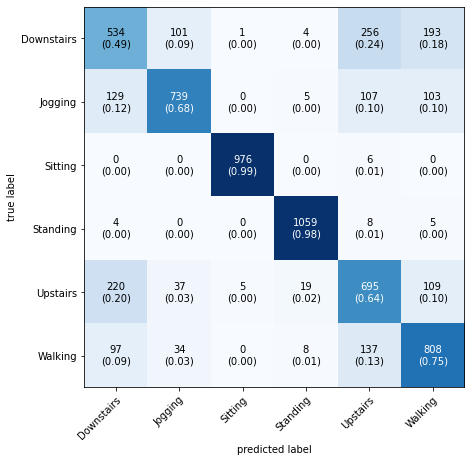

In [41]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

6. ExtraTrees

In [42]:
X, y = make_classification(n_features=4, random_state=0)
et = ExtraTreesClassifier(n_estimators=100, random_state=0)
et.fit(X_train, y_train)
predtrain = et.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== ET Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== ET Model Training Phase ====================

Train accuracy   :  0.9998660504989619 



In [43]:
#ExtraTreesClassifier(random_state=0)
et_features = list(range(0, X.shape[1]))
#test your model
et.fit(X_train, y_train)
pred = et.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = et.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== ET Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== ET Model Test Phase ====================

Test accuracy   :  0.7405844663228629 

              precision    recall  f1-score   support

   downstair    0.53946   0.49587   0.51675      1089
     jogging    0.78440   0.66851   0.72183      1083
     sitting    0.98489   0.99593   0.99038       982
    standing    0.95426   0.98885   0.97125      1076
     upstair    0.56459   0.60829   0.58563      1085
     walking    0.64524   0.71310   0.67748      1084

    accuracy                        0.74058      6399
   macro avg    0.74547   0.74509   0.74388      6399
weighted avg    0.74120   0.74058   0.73947      6399
 

[[ 540  105    3    9  250  182]
 [ 134  724    1    4  112  108]
 [   0    0  978    0    4    0]
 [   3    1    0 1064    4    4]
 [ 211   51    7   25  660  131]
 [ 113   42    4   13  139  773]]


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

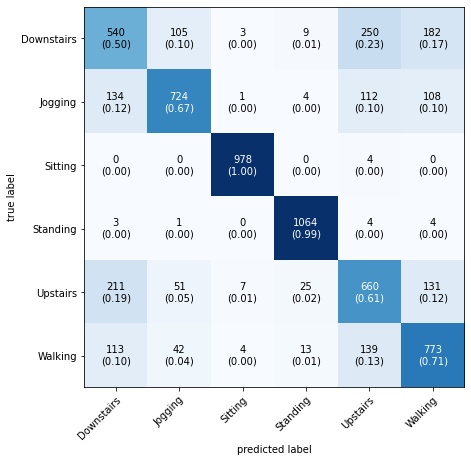

In [44]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

7. CatBoost

In [45]:
clf = CatBoostClassifier(iterations=6)
clf.fit(X_train, y_train, verbose=False)
predtrain = clf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)
print('==================== CB Model Training Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== CB Model Training Phase ====================

Train accuracy   :  0.7047752997120086 



In [46]:
#test your model
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = clf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== CLF Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

Learning rate set to 0.5
0:	learn: 1.2190031	total: 37.5ms	remaining: 188ms
1:	learn: 1.0130681	total: 70.8ms	remaining: 142ms
2:	learn: 0.9099281	total: 101ms	remaining: 101ms
3:	learn: 0.8459278	total: 127ms	remaining: 63.4ms
4:	learn: 0.8235823	total: 145ms	remaining: 29ms
5:	learn: 0.7916653	total: 166ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 1.2190031	total: 24.7ms	remaining: 123ms
1:	learn: 1.0130681	total: 46.4ms	remaining: 92.8ms
2:	learn: 0.9099281	total: 68.1ms	remaining: 68.1ms
3:	learn: 0.8459278	total: 88.5ms	remaining: 44.3ms
4:	learn: 0.8235823	total: 108ms	remaining: 21.6ms
5:	learn: 0.7916653	total: 129ms	remaining: 0us
==================== CLF Model Test Phase ====================

Test accuracy   :  0.697452726988592 

              precision    recall  f1-score   support

   downstair    0.48000   0.39669   0.43439      1089
     jogging    0.75444   0.62696   0.68482      1083
     sitting    0.97015   0.99287   0.98138       982
    standing    0.87190 

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

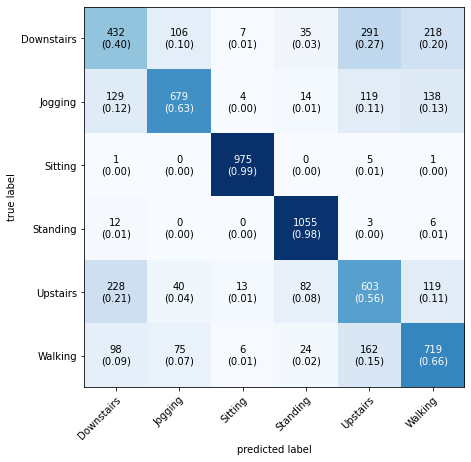

In [47]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

# Stacking 1

In [48]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=5000)

In [49]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model Train Phase ====================

Train accuracy   :  0.8194360726006296 



In [50]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model Test Phase ====================

Test accuracy   :  0.7474605407094859 

              precision    recall  f1-score   support

   downstair    0.52294   0.50230   0.51241      1089
     jogging    0.82556   0.68606   0.74937      1083
     sitting    0.99288   0.99389   0.99338       982
    standing    0.96520   0.97955   0.97232      1076
     upstair    0.57333   0.63410   0.60219      1085
     walking    0.66044   0.71771   0.68789      1084

    accuracy                        0.74793      6399
   macro avg    0.75673   0.75227   0.75293      6399
weighted avg    0.75248   0.74793   0.74861      6399
 

[[ 547   97    1    4  260  180]
 [ 137  743    0    5   96  102]
 [   2    0  976    0    4    0]
 [   5    0    0 1054    9    8]
 [ 231   31    6   19  688  110]
 [ 124   29    0   10  143  778]]


# Stacking 2

In [60]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('XGB', XGB)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=1000)

In [61]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + XGBoost Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + XGBoost Train Phase ====================

Train accuracy   :  0.814948764315853 



In [62]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + XGBoost Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + XGBoost Test Phase ====================

Test accuracy   :  0.7487107360525082 

              precision    recall  f1-score   support

   downstair    0.52581   0.50505   0.51522      1089
     jogging    0.82667   0.68698   0.75038      1083
     sitting    0.99187   0.99389   0.99288       982
    standing    0.96344   0.97955   0.97143      1076
     upstair    0.57143   0.63041   0.59947      1085
     walking    0.66469   0.72232   0.69231      1084

    accuracy                        0.74871      6399
   macro avg    0.75732   0.75304   0.75362      6399
weighted avg    0.75310   0.74871   0.74932      6399
 

[[ 550   94    1    4  260  180]
 [ 139  744    0    5   98   97]
 [   1    0  976    0    5    0]
 [   5    0    0 1054   10    7]
 [ 228   34    7   21  684  111]
 [ 123   28    0   10  140  783]]


# Stacking 3

In [52]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('lgbm', lgbm)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=10000)

In [53]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + LightGBM Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + LightGBM Train Phase ====================

Train accuracy   :  0.8282767396691447 



In [54]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + LightGBM Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + LightGBM Test Phase ====================

Test accuracy   :  0.751211126738553 

              precision    recall  f1-score   support

   downstair    0.52941   0.51240   0.52077      1089
     jogging    0.82080   0.68513   0.74685      1083
     sitting    0.99289   0.99491   0.99390       982
    standing    0.96886   0.98327   0.97601      1076
     upstair    0.57828   0.63318   0.60449      1085
     walking    0.66950   0.72694   0.69704      1084

    accuracy                        0.75168      6399
   macro avg    0.75996   0.75597   0.75651      6399
weighted avg    0.75576   0.75168   0.75224      6399
 

[[ 558   99    1    3  254  174]
 [ 136  742    0    5   98  102]
 [   1    0  977    0    4    0]
 [   4    0    0 1058    9    5]
 [ 236   30    6   18  687  108]
 [ 119   33    0    8  136  788]]


# Stacking 4

In [55]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('et', et)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=10000)

In [56]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + ExtraTree Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + ExtraTree Train Phase ====================

Train accuracy   :  0.9716027057799209 



In [57]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + ExtraTree Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + ExtraTree Test Phase ====================

Test accuracy   :  0.7548054383497421 

              precision    recall  f1-score   support

   downstair    0.54280   0.51240   0.52716      1089
     jogging    0.81698   0.68421   0.74472      1083
     sitting    0.99288   0.99389   0.99338       982
    standing    0.96812   0.98792   0.97792      1076
     upstair    0.58097   0.64147   0.60972      1085
     walking    0.66582   0.72786   0.69546      1084

    accuracy                        0.75371      6399
   macro avg    0.76126   0.75796   0.75806      6399
weighted avg    0.75710   0.75371   0.75383      6399
 

[[ 558  100    1    4  252  174]
 [ 137  741    0    4  100  101]
 [   2    0  976    0    4    0]
 [   5    0    0 1063    5    3]
 [ 215   34    6   16  696  118]
 [ 111   32    0   11  141  789]]


# Stacking 5

In [58]:
#stack together individual model --> estimator
cart = DecisionTreeClassifier()
eclf = [('rf',rf), ('classifier', classifier), ('cart', cart), ('knn', knn), ('clf', clf)]
#logistic regression used --> final estimator
lr = LogisticRegression(penalty='elasticnet', l1_ratio=1, solver='saga', max_iter=1000)

In [63]:
sclf = StackingClassifier(estimators = eclf, final_estimator = lr) 
sclf.fit(X_train, y_train)

#Train Phase
predtrain = sclf.predict(X_train)
train_acc = accuracy_score(predtrain, y_train)

print('==================== Ensemble Model + CatBoost Train Phase ====================\n')
print('Train accuracy   : ', train_acc, '\n')

==================== Ensemble Model + CatBoost Train Phase ====================

Train accuracy   :  0.8168240573303864 



In [64]:
#Test Phase
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)
test_acc = accuracy_score(pred,y_test)
y_pred = sclf.fit(X_train, y_train).predict(X_test)
target_names = ['downstair', 'jogging', 'sitting', 'standing', 'upstair', 'walking']

print('==================== Ensemble Model + CatBoost Test Phase ====================\n')
print('Test accuracy   : ', test_acc, '\n')
print(classification_report(y_test, y_pred, target_names = target_names, digits = 5), '\n')
print(confusion_matrix(y_test, y_pred))

==================== Ensemble Model + CatBoost Test Phase ====================

Test accuracy   :  0.7480856383809971 

              precision    recall  f1-score   support

   downstair    0.52273   0.50689   0.51469      1089
     jogging    0.83072   0.68421   0.75038      1083
     sitting    0.99389   0.99389   0.99389       982
    standing    0.96259   0.98048   0.97145      1076
     upstair    0.57036   0.63134   0.59930      1085
     walking    0.66126   0.71494   0.68706      1084

    accuracy                        0.74762      6399
   macro avg    0.75692   0.75196   0.75279      6399
weighted avg    0.75267   0.74762   0.74847      6399
 

[[ 552   91    1    4  260  181]
 [ 141  741    0    5   99   97]
 [   1    0  976    0    5    0]
 [   6    0    0 1055    8    7]
 [ 230   32    5   21  685  112]
 [ 126   28    0   11  144  775]]
